# Principal Component Analysis of the Breast Cancer Dataset

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()
X = data.data
Y = data.target

print(X.shape)
print(Y.shape)
print(Y.dtype)

(569, 30)
(569,)
int64


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [6]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

(398, 30)


## Compute the covariance matrix and its eigenvalues

In [11]:
cov_mat = np.cov(X_train_sc.T)
eigvals_cov, eigvecs_cov = np.linalg.eig(cov_mat)

[1.33619996e+01 5.77613227e+00 2.83172331e+00 1.99464701e+00
 1.56506341e+00 1.18173548e+00 7.39253182e-01 4.81500525e-01
 4.47377728e-01 3.59251865e-01 2.76598828e-01 2.41469690e-01
 1.89614117e-01 1.51520781e-01 1.00837584e-01 7.31514176e-02
 5.65453910e-02 5.45293598e-02 4.62442661e-02 3.14881362e-02
 2.80669748e-02 2.36060675e-02 1.26373736e-04 6.33203650e-04
 1.24812097e-03 1.98992275e-02 1.57750910e-02 6.29340590e-03
 8.15218251e-03 1.10821457e-02]


## Variance explained ratios and cumulative sum

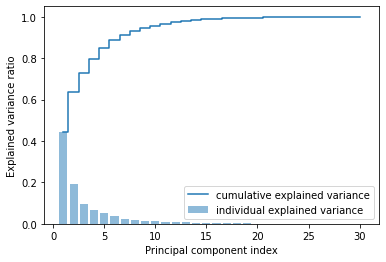

In [12]:
tot = sum(eigvals_cov)
var_expl_ratios = [(l / tot) for l in sorted(eigvals_cov, reverse=True)]

cum_sum_expl_ratios = np.cumsum(var_expl_ratios)

# plot explained variances
plt.bar(range(1,31), var_expl_ratios, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,31), cum_sum_expl_ratios, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

We can see that already with 4 components, we have reached 80\% of the cumulative sum of the eigenvalues

## Selection of the two principal components and projection

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
eigenpairs_cov = [(np.abs(eigvals_cov[i]), eigvecs_cov[:, i]) for i in range(len(eigvals_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigenpairs_cov.sort(key=lambda k: k[0], reverse=True)

In [14]:
w = np.hstack((eigenpairs_cov[0][1][:, np.newaxis], eigenpairs_cov[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.2185744  -0.23269304]
 [ 0.09943658 -0.04518212]
 [ 0.22689759 -0.21511138]
 [ 0.22041417 -0.23091785]
 [ 0.14604177  0.18164928]
 [ 0.24007255  0.14810627]
 [ 0.26068389  0.04649103]
 [ 0.25985533 -0.04286871]
 [ 0.1405877   0.19442808]
 [ 0.06125885  0.3644168 ]
 [ 0.20734509 -0.1112404 ]
 [ 0.01820432  0.08220532]
 [ 0.21094537 -0.09477317]
 [ 0.2004511  -0.15234119]
 [ 0.00988444  0.20625773]
 [ 0.16686329  0.23580134]
 [ 0.15908967  0.18699806]
 [ 0.18553431  0.11315016]
 [ 0.04281591  0.19027379]
 [ 0.10637555  0.27788893]
 [ 0.22879137 -0.21466785]
 [ 0.10073717 -0.03365085]
 [ 0.23671966 -0.19619496]
 [ 0.22617485 -0.21411621]
 [ 0.1236782   0.18696912]
 [ 0.20970098  0.15116191]
 [ 0.22807551  0.09811137]
 [ 0.25096058 -0.00580671]
 [ 0.12005442  0.16348388]
 [ 0.13083763  0.27977269]]


In [15]:
X_train_pca = X_train_sc.dot(w)

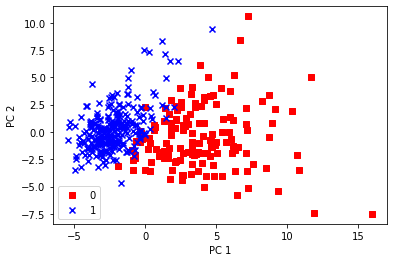

In [16]:
colors = ['r', 'b']
markers = ['s', 'x']
for l, c, m in zip(np.unique(Y_train), colors, markers):
    plt.scatter(X_train_pca[Y_train==l, 0], 
                X_train_pca[Y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()